In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn

In [10]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import seaborn as sb

In [6]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
print(url) 

https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


In [7]:
clunas = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

df = pd.read_csv(url, header=None, names=clunas)
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [8]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


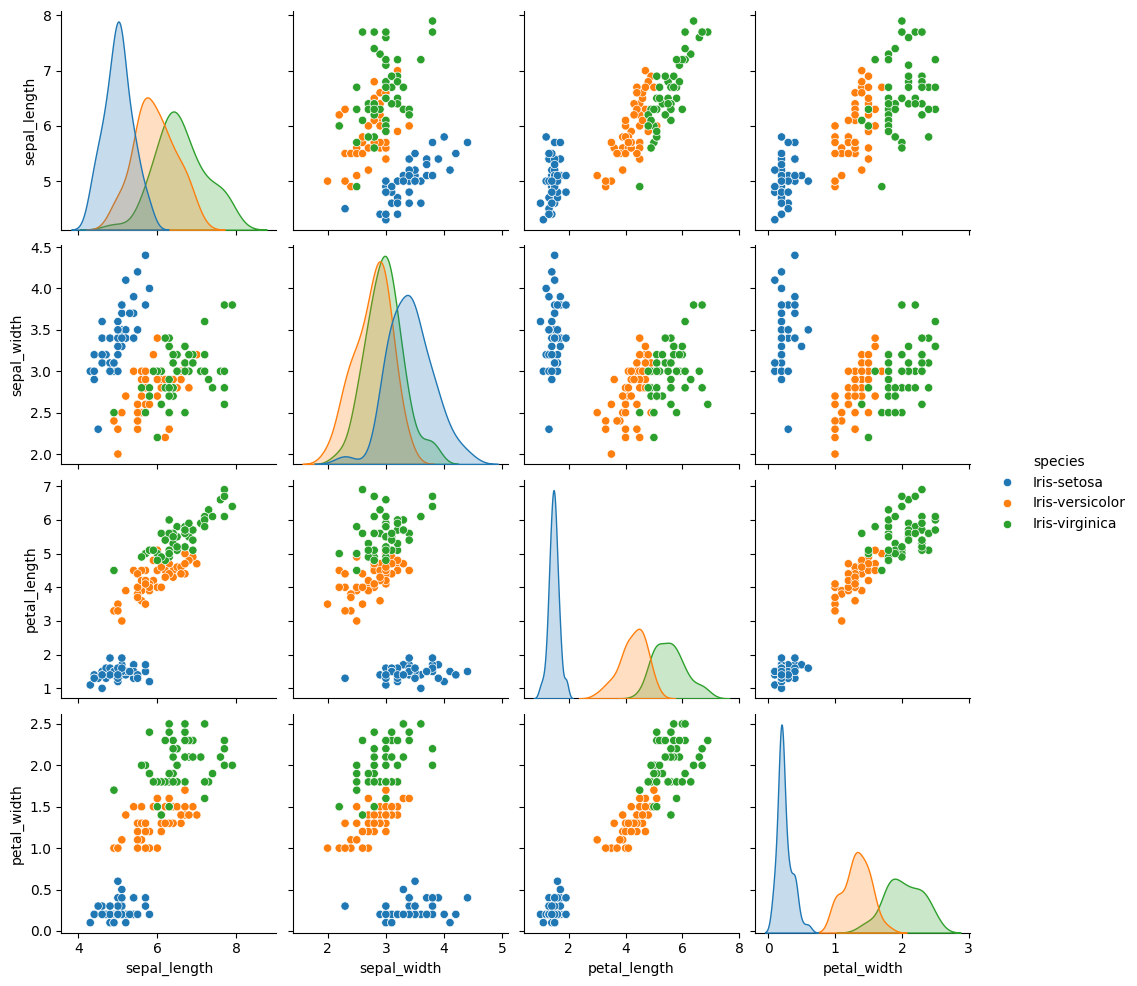

In [11]:
sb.pairplot(df, hue='species')
plt.show()

In [12]:
x = df.drop('species', axis=1)

KMeans = KMeans(n_clusters=3, random_state=42)
KMeans.fit(x)

df['cluster'] = KMeans.labels_

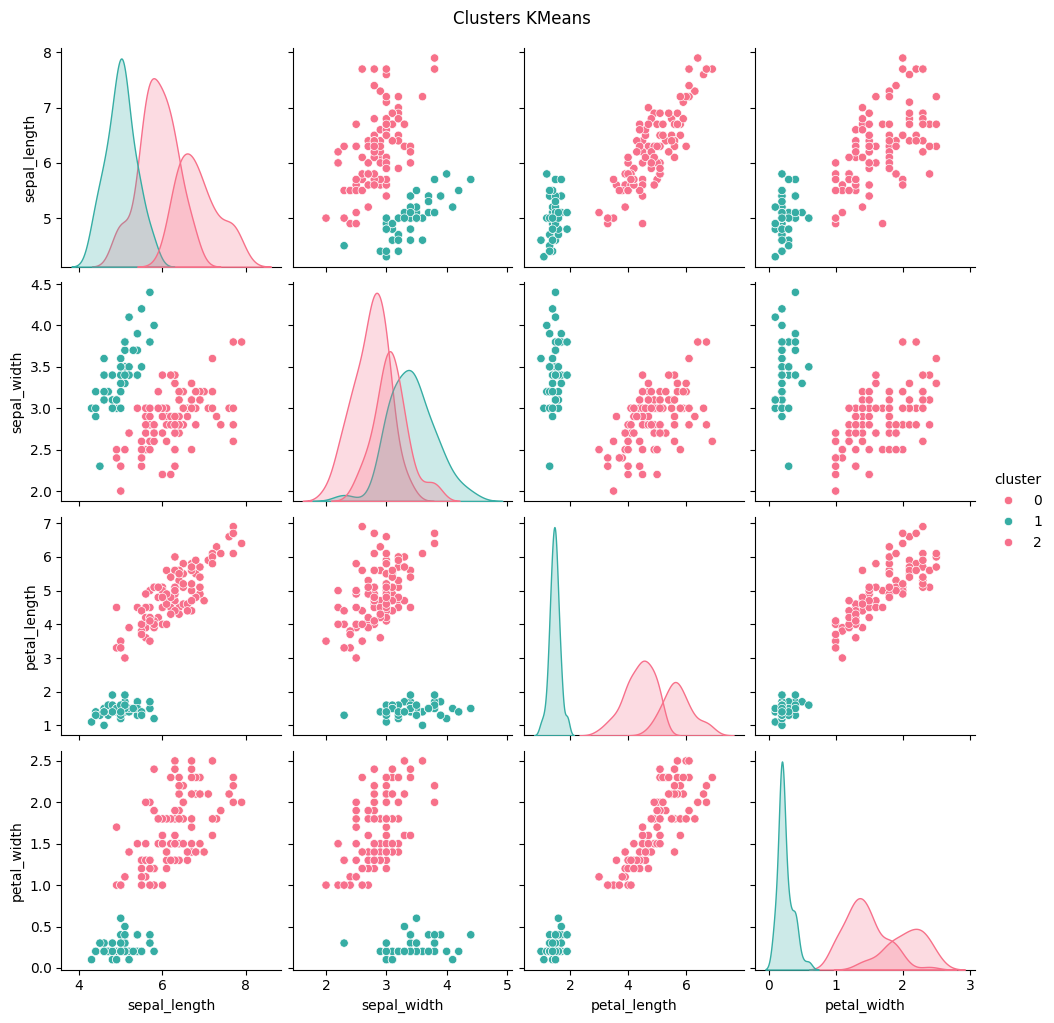

In [13]:
sb.pairplot(df, hue='cluster', palette= 'husl')
plt.suptitle('Clusters KMeans', y=1.02)
plt.show()

In [15]:
df['species'] = df['species'].str.replace("Iris-", "")

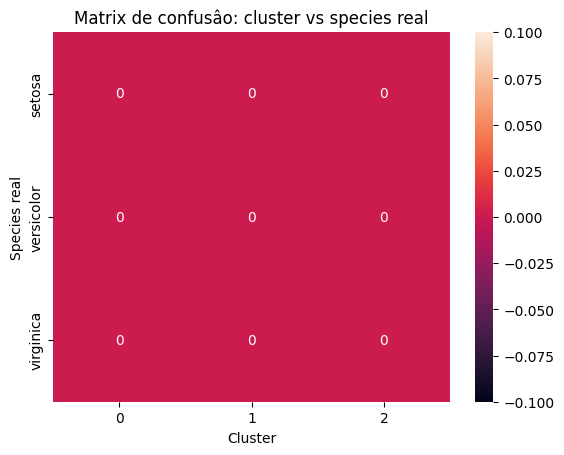

In [18]:
conf_matrix = confusion_matrix(df['species'], df['cluster'], labels=['setosa', 'versicolor', 'virginica'])

sb.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=[0,1,2], yticklabels=['setosa', 'versicolor', 'virginica'])

plt.xlabel('Cluster')
plt.ylabel('Species real')
plt.title('Matrix de confusâo: cluster vs species real')
plt.show()